##Se importan librerias y una base de datos para tratar.

In [1]:
# Montar Google Drive en Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Importar la biblioteca Pandas
import pandas as pd

# Ruta al archivo CSV en Google Drive
file_path = "/content/drive/MyDrive/python-tweets_turismo_1K.csv"

# Leer el archivo CSV utilizando Pandas
datos = pd.read_csv(file_path)

# Mostrar  los datos para verificar que se hayan cargado correctamente
print(datos)


Mounted at /content/drive
                           date                   id  \
0     2023-06-20 15:39:38+00:00  1671181020303962112   
1     2023-06-20 15:38:32+00:00  1671180742083182592   
2     2023-06-20 15:34:44+00:00  1671179786960396288   
3     2023-06-20 15:24:01+00:00  1671177086554320896   
4     2023-06-20 15:22:57+00:00  1671176818093871110   
...                         ...                  ...   
997   2023-06-19 10:07:05+00:00  1670734943461285893   
998   2023-06-19 10:05:22+00:00  1670734511024291840   
999   2023-06-19 10:03:29+00:00  1670734035507724291   
1000  2023-06-19 10:02:30+00:00  1670733787498422273   
1001  2023-06-19 10:01:17+00:00  1670733481645678592   

                                                content         username  \
0     Un placer haber representado a @GaiaXSpain dur...        dordonyez   
1     ✅ Vota por la Ciudad de México ANTES del 30 de...           GMAMX2   
2     Descubre los mejores restaurantes de El Campel...       elPachinko 

##Se importan librerias de nltk(NaturalLanguajeToolkit) para el analisis de sentimiento de cada Tweet

In [4]:
# Instalar y descargar NLTK
!pip install nltk
import nltk
nltk.download('vader_lexicon')

# Importar las bibliotecas necesarias
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimientos VADER
sid = SentimentIntensityAnalyzer()

# Definir una función para asignar un etiqueta de sentimiento a cada tweet
def get_sentimientos(tweet):
    # Obtener la puntuación de sentimiento del tweet utilizando VADER
    scores = sid.polarity_scores(tweet)

    # Determinar la etiqueta de sentimiento basada en la puntuación compuesta
    if scores['compound'] > 0.05:
        return 'Positivo'
    elif scores['compound'] < -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicar la función a cada tweet en los datos y crear una nueva columna llamada "Sentimiento"
datos['Sentimiento'] = datos['content'].apply(get_sentimientos)

# Mostrar los primeros tweets con sus etiquetas de sentimiento
print(datos[['content', 'Sentimiento']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                content Sentimiento
0     Un placer haber representado a @GaiaXSpain dur...     Neutral
1     ✅ Vota por la Ciudad de México ANTES del 30 de...     Neutral
2     Descubre los mejores restaurantes de El Campel...     Neutral
3     Verano de desconexión: 5 escapadas rurales muy...     Neutral
4     #Turismo | Descubre el nuevo billete de loterí...     Neutral
...                                                 ...         ...
997   🔥🌠\nCelebra el Solsticio de Verano y la Noche ...     Neutral
998   🌴 ¡Despertar el explorador en ti nunca fue tan...     Neutral
999   La patronal denuncia los "graves incumplimient...    Negativo
1000  El de las #objeciones en #ventas y cómo derrib...     Neutral
1001  Avete già visitato Cork? O questa città del su...     Neutral

[1002 rows x 2 columns]


##Se realizan gráficos con los resultados del analisis

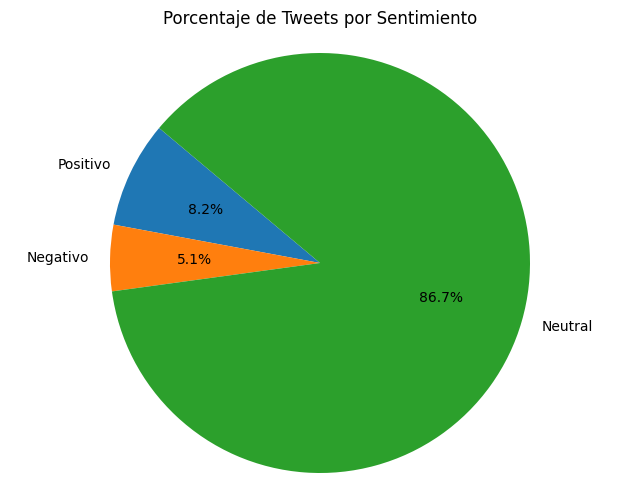

In [5]:
import matplotlib.pyplot as plt


# Contar la cantidad de tweets en cada categoría de sentimiento
sentimiento_counts = datos['Sentimiento'].value_counts()

# Calcular el porcentaje de tweets en cada categoría de sentimiento
total_tweets = len(datos)
porcentaje_positivo = (sentimiento_counts['Positivo'] / total_tweets) * 100
porcentaje_negativo = (sentimiento_counts['Negativo'] / total_tweets) * 100
porcentaje_neutral = (sentimiento_counts['Neutral'] / total_tweets) * 100

# Etiquetas y porcentajes para el gráfico circular
etiquetas = ['Positivo', 'Negativo', 'Neutral']
porcentajes = [porcentaje_positivo, porcentaje_negativo, porcentaje_neutral]

# Crear el gráfico circular
plt.figure(figsize=(8, 6))
plt.pie(porcentajes, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Tweets por Sentimiento')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()


##En caso de agregar un nuevo Tweet


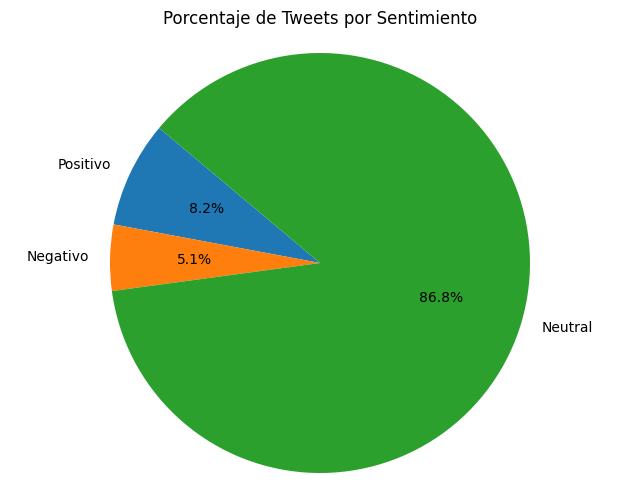

In [7]:
# Agregar el nuevo tweet al conjunto de datos
nuevo_tweet = "Este es un nuevo tweet sobre turismo. #Turismo #nuevo"
nuevo_tweet_sentimiento = get_sentimientos(nuevo_tweet)  # Utiliza la función get_sentiment definida anteriormente

# Crear un nuevo DataFrame con el nuevo tweet
nuevo_tweet_df = pd.DataFrame({'text': [nuevo_tweet], 'Sentimiento': [nuevo_tweet_sentimiento]})

# Concatenar el nuevo DataFrame con el conjunto de datos existente
datos = pd.concat([datos, nuevo_tweet_df], ignore_index=True)


sentimiento_counts = datos['Sentimiento'].value_counts()


total_tweets = len(datos)
porcentaje_positivo = (sentimiento_counts['Positivo'] / total_tweets) * 100
porcentaje_negativo = (sentimiento_counts['Negativo'] / total_tweets) * 100
porcentaje_neutral = (sentimiento_counts['Neutral'] / total_tweets) * 100

etiquetas = ['Positivo', 'Negativo', 'Neutral']
porcentajes = [porcentaje_positivo, porcentaje_negativo, porcentaje_neutral]


plt.figure(figsize=(8, 6))
plt.pie(porcentajes, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Tweets por Sentimiento')
plt.axis('equal')
plt.show()
